# Exploratory Data Analysis

# Import and Inspect the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load CSV file
df_train = pd.read_csv("/content/loan_approval_system_train.csv")
df_train = df_train.drop('Loan_ID',axis=1)
df_test = pd.read_csv("/content/loan_approval_system_test.csv")
df_test = df_test.drop('Loan_ID',axis=1)

In [ ]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Examine the size of the data
df_train.shape

(614, 12)

In [ ]:
df_test.shape

(367, 11)

In [ ]:
# Check for missing values
missing_values = df_train.isnull().sum()
print(missing_values)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
missing_values = df_test.isnull().sum()
print(missing_values)

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


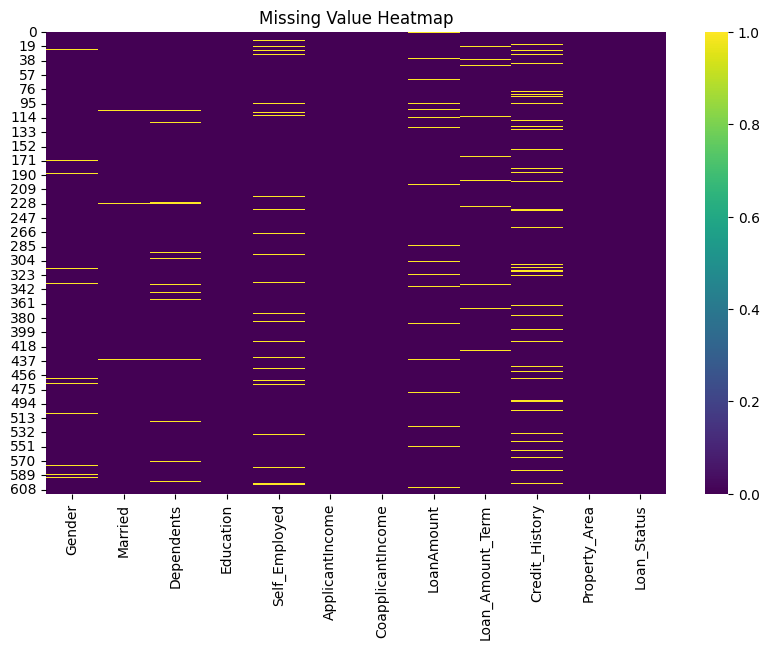

In [ ]:
# Visualise missing data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(),cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

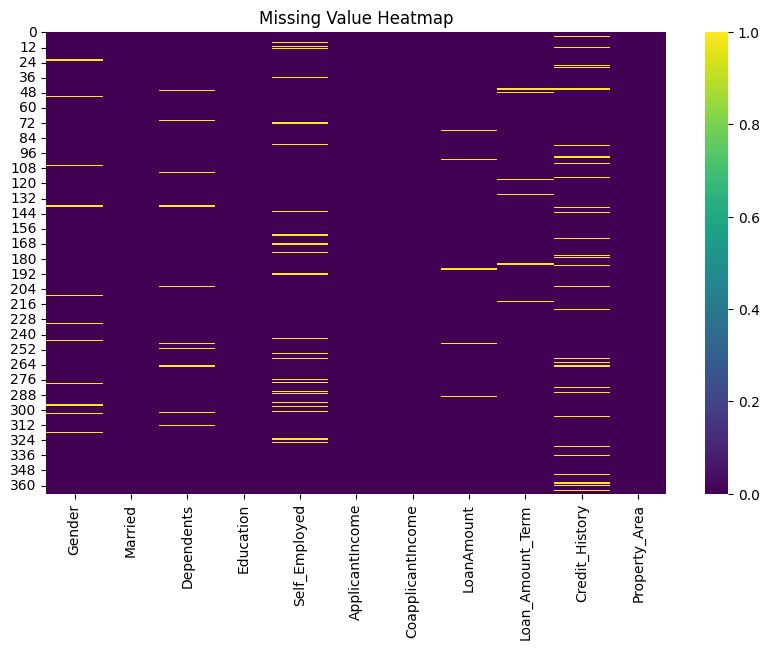

In [ ]:
# Visualise missing data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_test.isnull(),cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

In [ ]:
# Identify data types for each variable
df_train.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [ ]:
df_test.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [ ]:
# Negative Values for Numerical Columns
numerical_columns = df_train.select_dtypes(include=np.number).columns
negative_values = df_train[numerical_columns].lt(0).any(axis=1)

invalid_rows = df_train[negative_values]
print(invalid_rows)

Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


In [ ]:
numerical_columns = df_test.select_dtypes(include=np.number).columns
negative_values = df_test[numerical_columns].lt(0).any(axis=1)

invalid_rows = df_test[negative_values]
print(invalid_rows)

Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []


In [ ]:
# Check for duplicate rows
duplicates = df_train.duplicated().sum()
print(duplicates)

0


In [ ]:
duplicates = df_test.duplicated().sum()
print(duplicates)
df_test_1 = df_test.drop_duplicates(keep='last')
print(df_test_1.duplicated().sum())

1
0


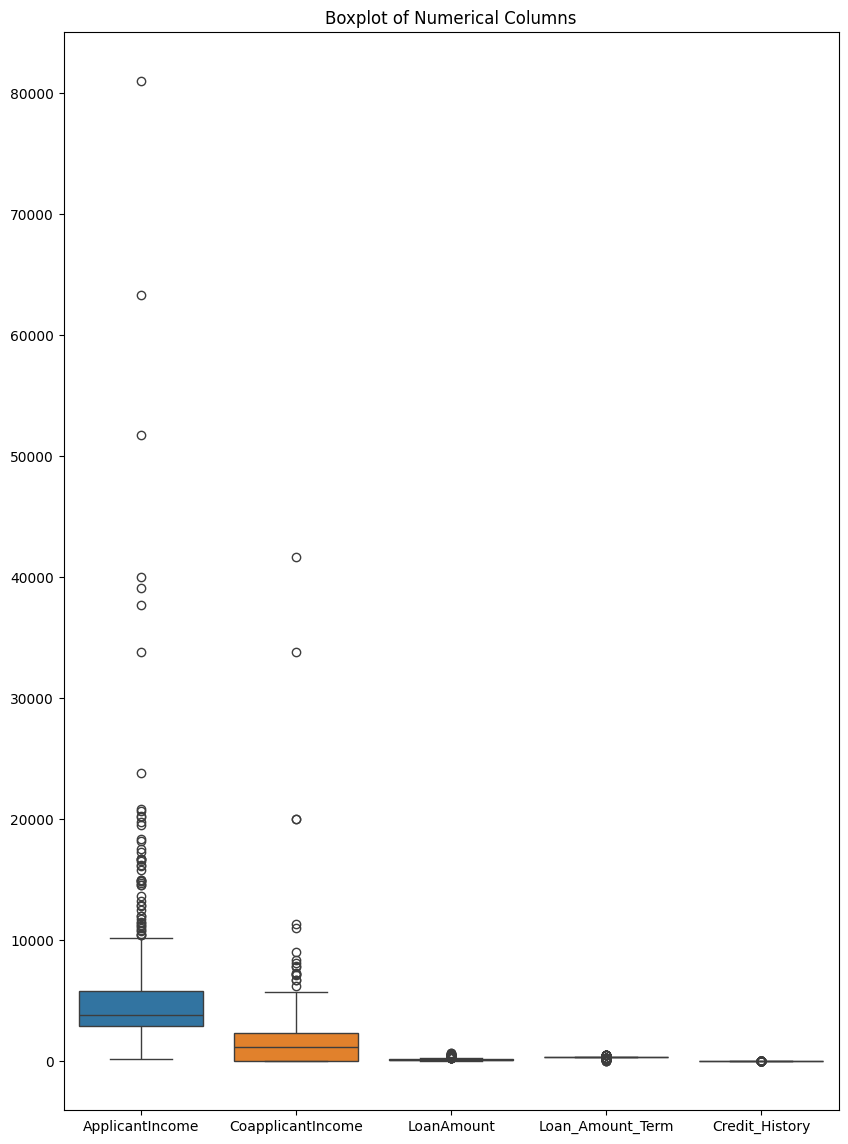

In [ ]:
# Detect Outlier using Box Plot
plt.figure(figsize=(10,14))
sns.boxplot(data=df_train[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.show()


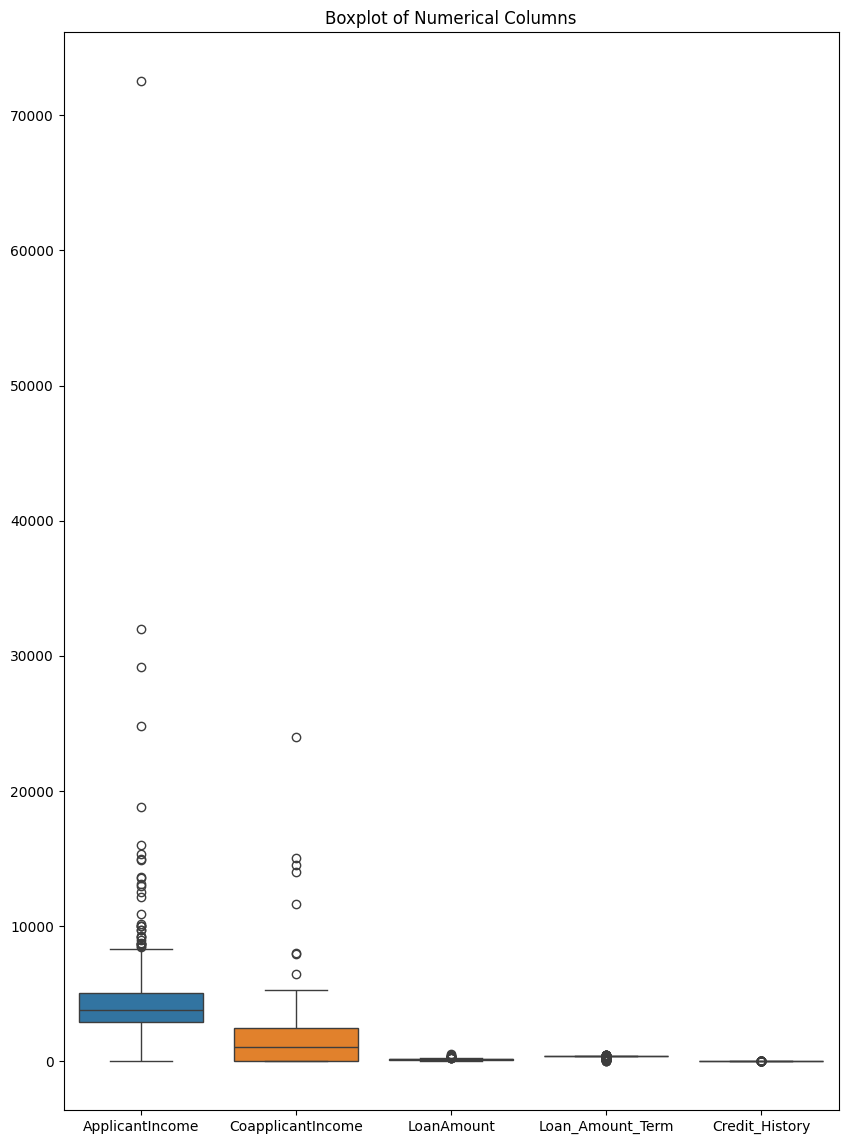

In [ ]:
plt.figure(figsize=(10,14))
sns.boxplot(data=df_test[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.show()


# Handle Missing Data

In [ ]:
# Create list for categorical and numerical
categorical_cols_with_na = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
numerical_cols_with_na = ['LoanAmount', 'Loan_Amount_Term']


In [ ]:
# Impute categorical columns with the mode
imputer_mode = SimpleImputer(strategy='most_frequent')
df_train[categorical_cols_with_na] = imputer_mode.fit_transform(df_train[categorical_cols_with_na])

# Impute numerical columns with the median
imputer_median = SimpleImputer(strategy='median')
df_train[numerical_cols_with_na] = imputer_median.fit_transform(df_train[numerical_cols_with_na])

print(df_train.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
# Impute categorical columns with the mode
imputer_mode = SimpleImputer(strategy='most_frequent')
df_test[categorical_cols_with_na] = imputer_mode.fit_transform(df_test[categorical_cols_with_na])

# Impute numerical columns with the median
imputer_median = SimpleImputer(strategy='median')
df_test[numerical_cols_with_na] = imputer_median.fit_transform(df_test[numerical_cols_with_na])

print(df_test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


# Explore Data Characteristics

In [ ]:
# Summary Statistics for Numerical Variables
numerical_columns = df_train.select_dtypes(include=np.number).columns
print(df_train[numerical_columns].describe().round(3))

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count          614.000            614.000     614.000           614.000
mean          5403.459           1621.246     145.752           342.410
std           6109.042           2926.248      84.107            64.429
min            150.000              0.000       9.000            12.000
25%           2877.500              0.000     100.250           360.000
50%           3812.500           1188.500     128.000           360.000
75%           5795.000           2297.250     164.750           360.000
max          81000.000          41667.000     700.000           480.000


In [ ]:
# Skewness
num_col = ['Loan_Amount_Term','CoapplicantIncome','Loan_Amount_Term']
print(df_train[num_col].skew())

Loan_Amount_Term    -2.402112
CoapplicantIncome    7.491531
Loan_Amount_Term    -2.402112
dtype: float64


In [ ]:
# Kurtosis
print(df_train[num_col].kurt())

Loan_Amount_Term      6.924993
CoapplicantIncome    84.956384
Loan_Amount_Term      6.924993
dtype: float64


# Data Transformation

In [ ]:
# combine ApplicantIncome/LoanAmount and drop these 2 columns
df_train['Income_to_Loan'] = df_train['ApplicantIncome'] /df_train['LoanAmount']
df_train = df_train.drop(['ApplicantIncome', 'LoanAmount'], axis=1)
# do for test also
df_test['Income_to_Loan'] = df_test['ApplicantIncome'] /df_test['LoanAmount']
df_test = df_test.drop(['ApplicantIncome', 'LoanAmount'], axis=1)

In [ ]:
# Standardisation

numerical_columns = df_train.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_train.head()


numerical_columns = df_test.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Income_to_Loan
0,Male,Yes,0,Graduate,No,0.000000,0.746835,1.0,Urban,0.130000
1,Male,Yes,1,Graduate,No,0.062500,0.746835,1.0,Urban,0.061032
2,Male,Yes,2,Graduate,No,0.075000,0.746835,1.0,Urban,0.060096
3,Male,Yes,2,Graduate,No,0.106083,0.746835,1.0,Urban,0.058500
4,Male,No,0,Not Graduate,No,0.000000,0.746835,1.0,Urban,0.105000


In [ ]:
# Using training & testing dataset

# Label Encoding for categorical columns
le = LabelEncoder()
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in cat_cols:
  df_train[col] = le.fit_transform(df_train[col])
df_train.head()


,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_to_Loan
0,1,0,0,0,0,0.000000,0.74359,1.0,2,Y,0.134924
1,1,1,1,0,0,0.036192,0.74359,1.0,0,N,0.104992
2,1,1,0,0,1,0.000000,0.74359,1.0,2,Y,0.134196
3,1,1,0,1,0,0.056592,0.74359,1.0,2,Y,0.061778
4,1,0,0,0,0,0.000000,0.74359,1.0,2,Y,0.125415


In [ ]:
for col in cat_cols:
    df_test[col] = le.fit_transform(df_test[col])
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Income_to_Loan
0,1,1,0,0,0,0.000000,0.746835,1.0,2,0.130000
1,1,1,1,0,0,0.062500,0.746835,1.0,2,0.061032
2,1,1,2,0,0,0.075000,0.746835,1.0,2,0.060096
3,1,1,2,0,0,0.106083,0.746835,1.0,2,0.058500
4,1,0,0,1,0,0.000000,0.746835,1.0,2,0.105000



# Explore Data Characteristics





# Visualize Data Relationship

In [ ]:
# Frequency table for categorical data in tabular format
categorical_columns = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
for col in categorical_columns:
    print(f"Frequency table for {col}:")
    print(df_train[col].value_counts())
    print("\n")


Frequency table for Gender:
Gender
1    502
0    112
Name: count, dtype: int64


Frequency table for Married:
Married
1    401
0    213
Name: count, dtype: int64


Frequency table for Dependents:
Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64


Frequency table for Education:
Education
0    480
1    134
Name: count, dtype: int64


Frequency table for Self_Employed:
Self_Employed
0    532
1     82
Name: count, dtype: int64


Frequency table for Credit_History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


Frequency table for Property_Area:
Property_Area
1    233
2    202
0    179
Name: count, dtype: int64


Frequency table for Loan_Status:
Loan_Status
Y    422
N    192
Name: count, dtype: int64




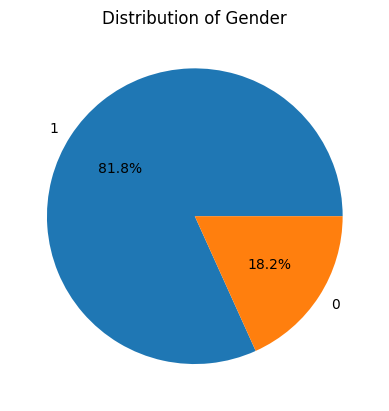

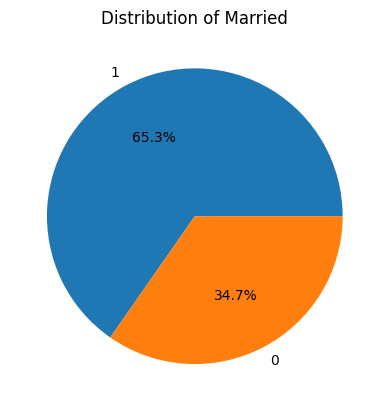

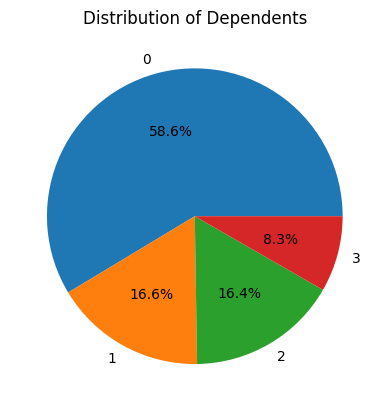

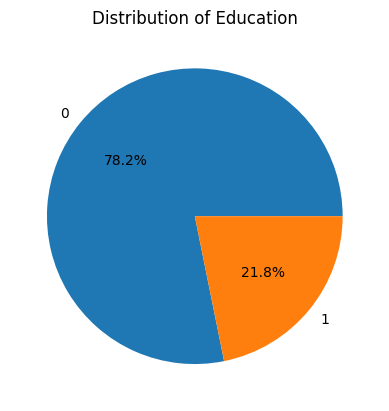

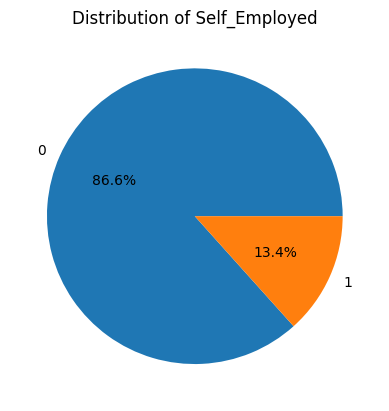

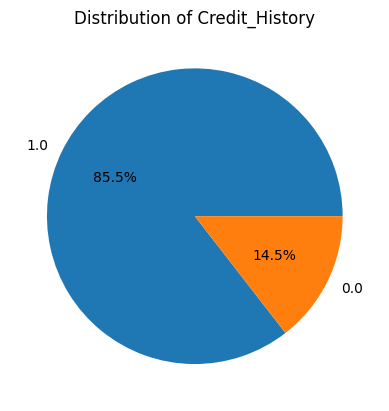

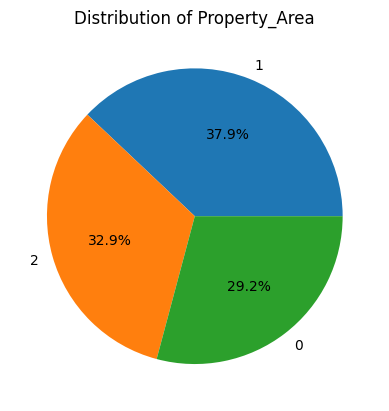

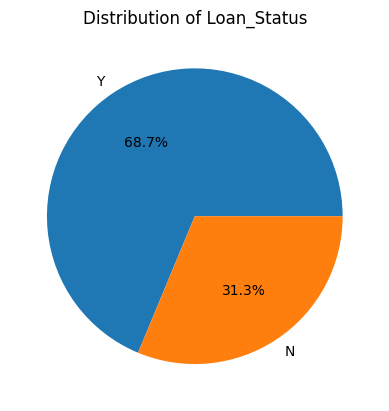

In [ ]:
for col in categorical_columns:
    plt.figure()  # Adjust figure size as needed for better visualization
    df_train[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Remove default y-label
    plt.show()


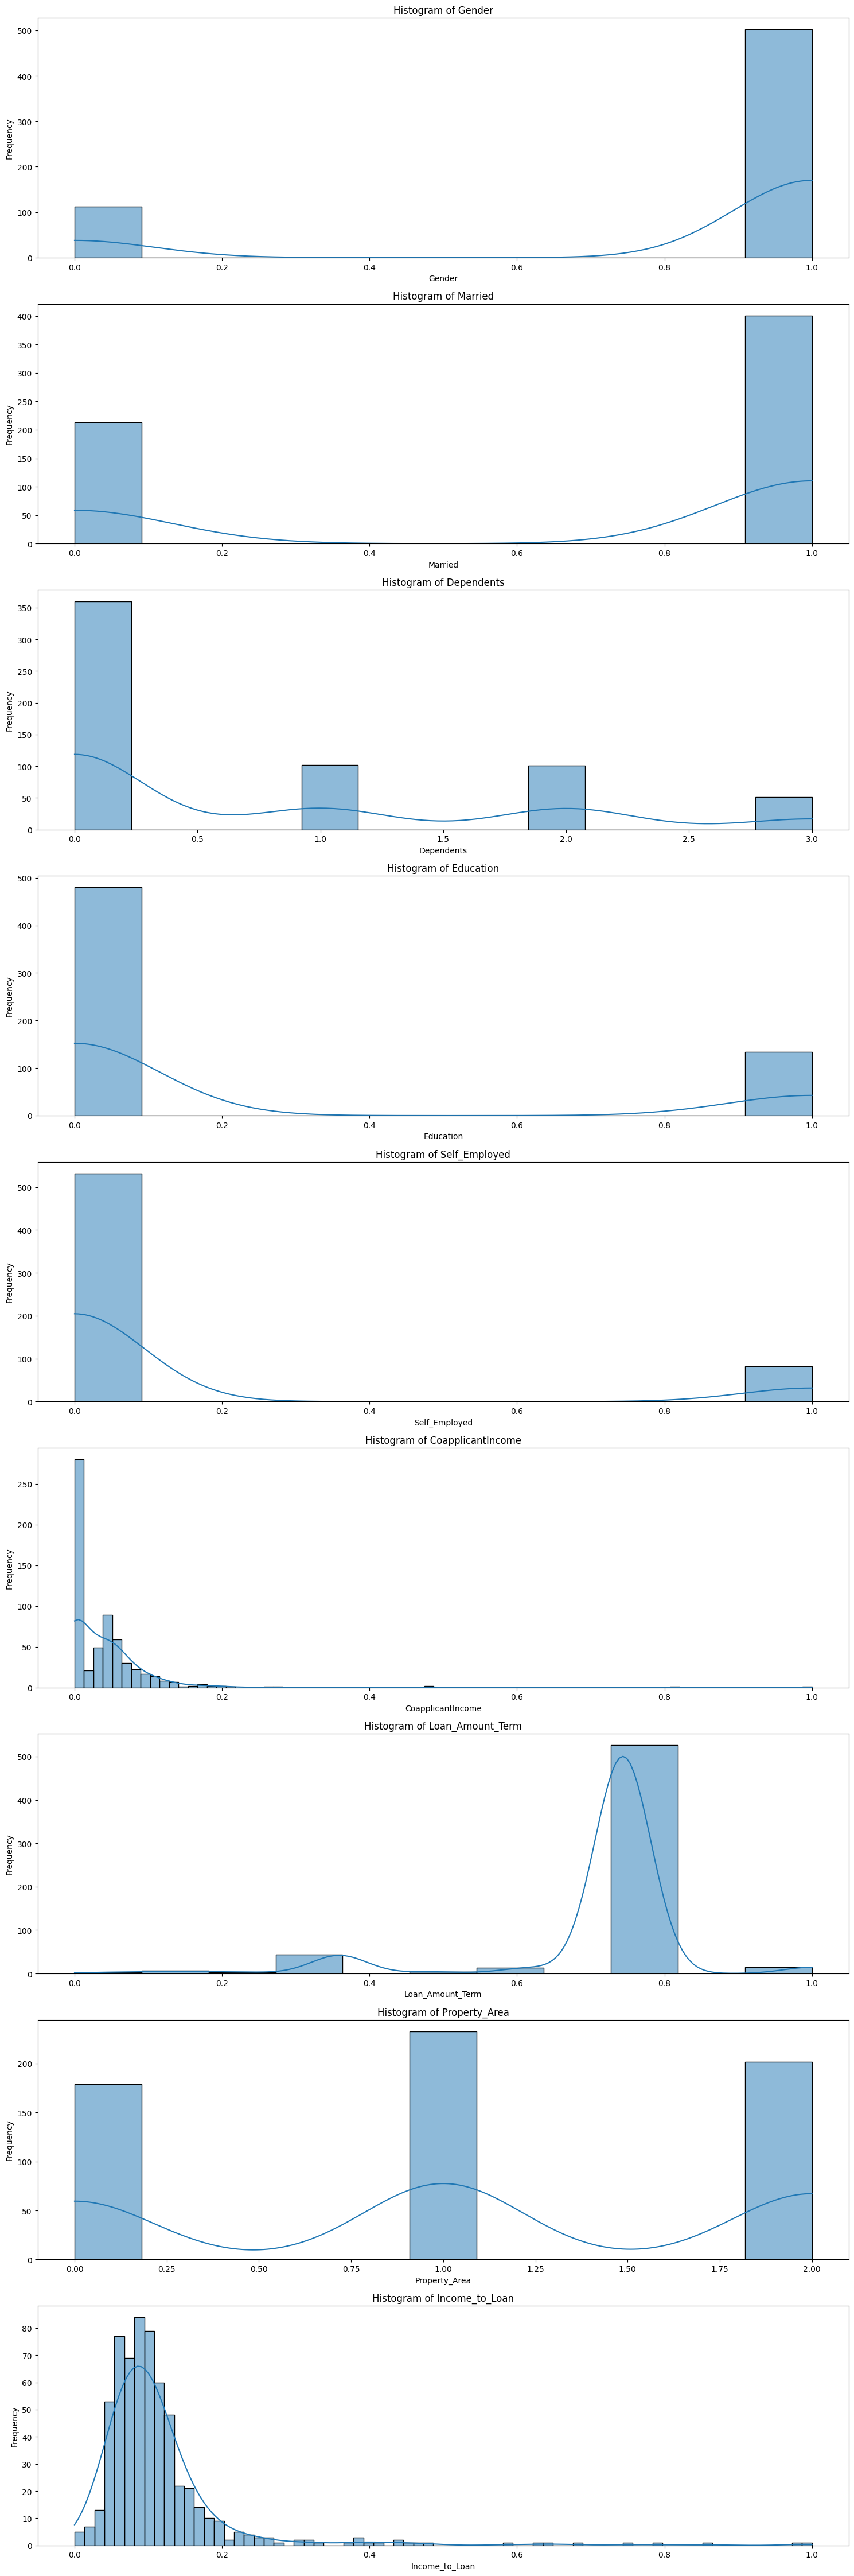

In [ ]:
numerical_cols = df_train.select_dtypes(include=np.number).columns
num_cols = len(numerical_cols) # This is where the problem was

# Create a figure with subplots for histograms
plt.figure(figsize=(15, 5 * num_cols))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_cols, 1, i + 1)
    sns.histplot(data=df_train, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

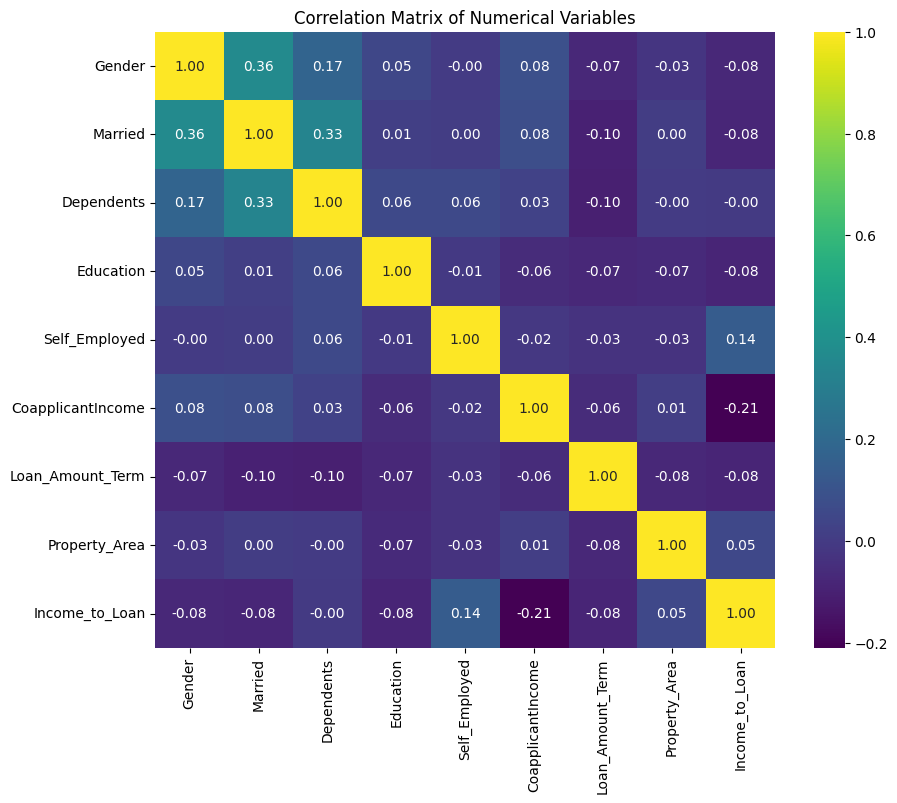

In [ ]:
correlation_matrix = df_train[numerical_cols].corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

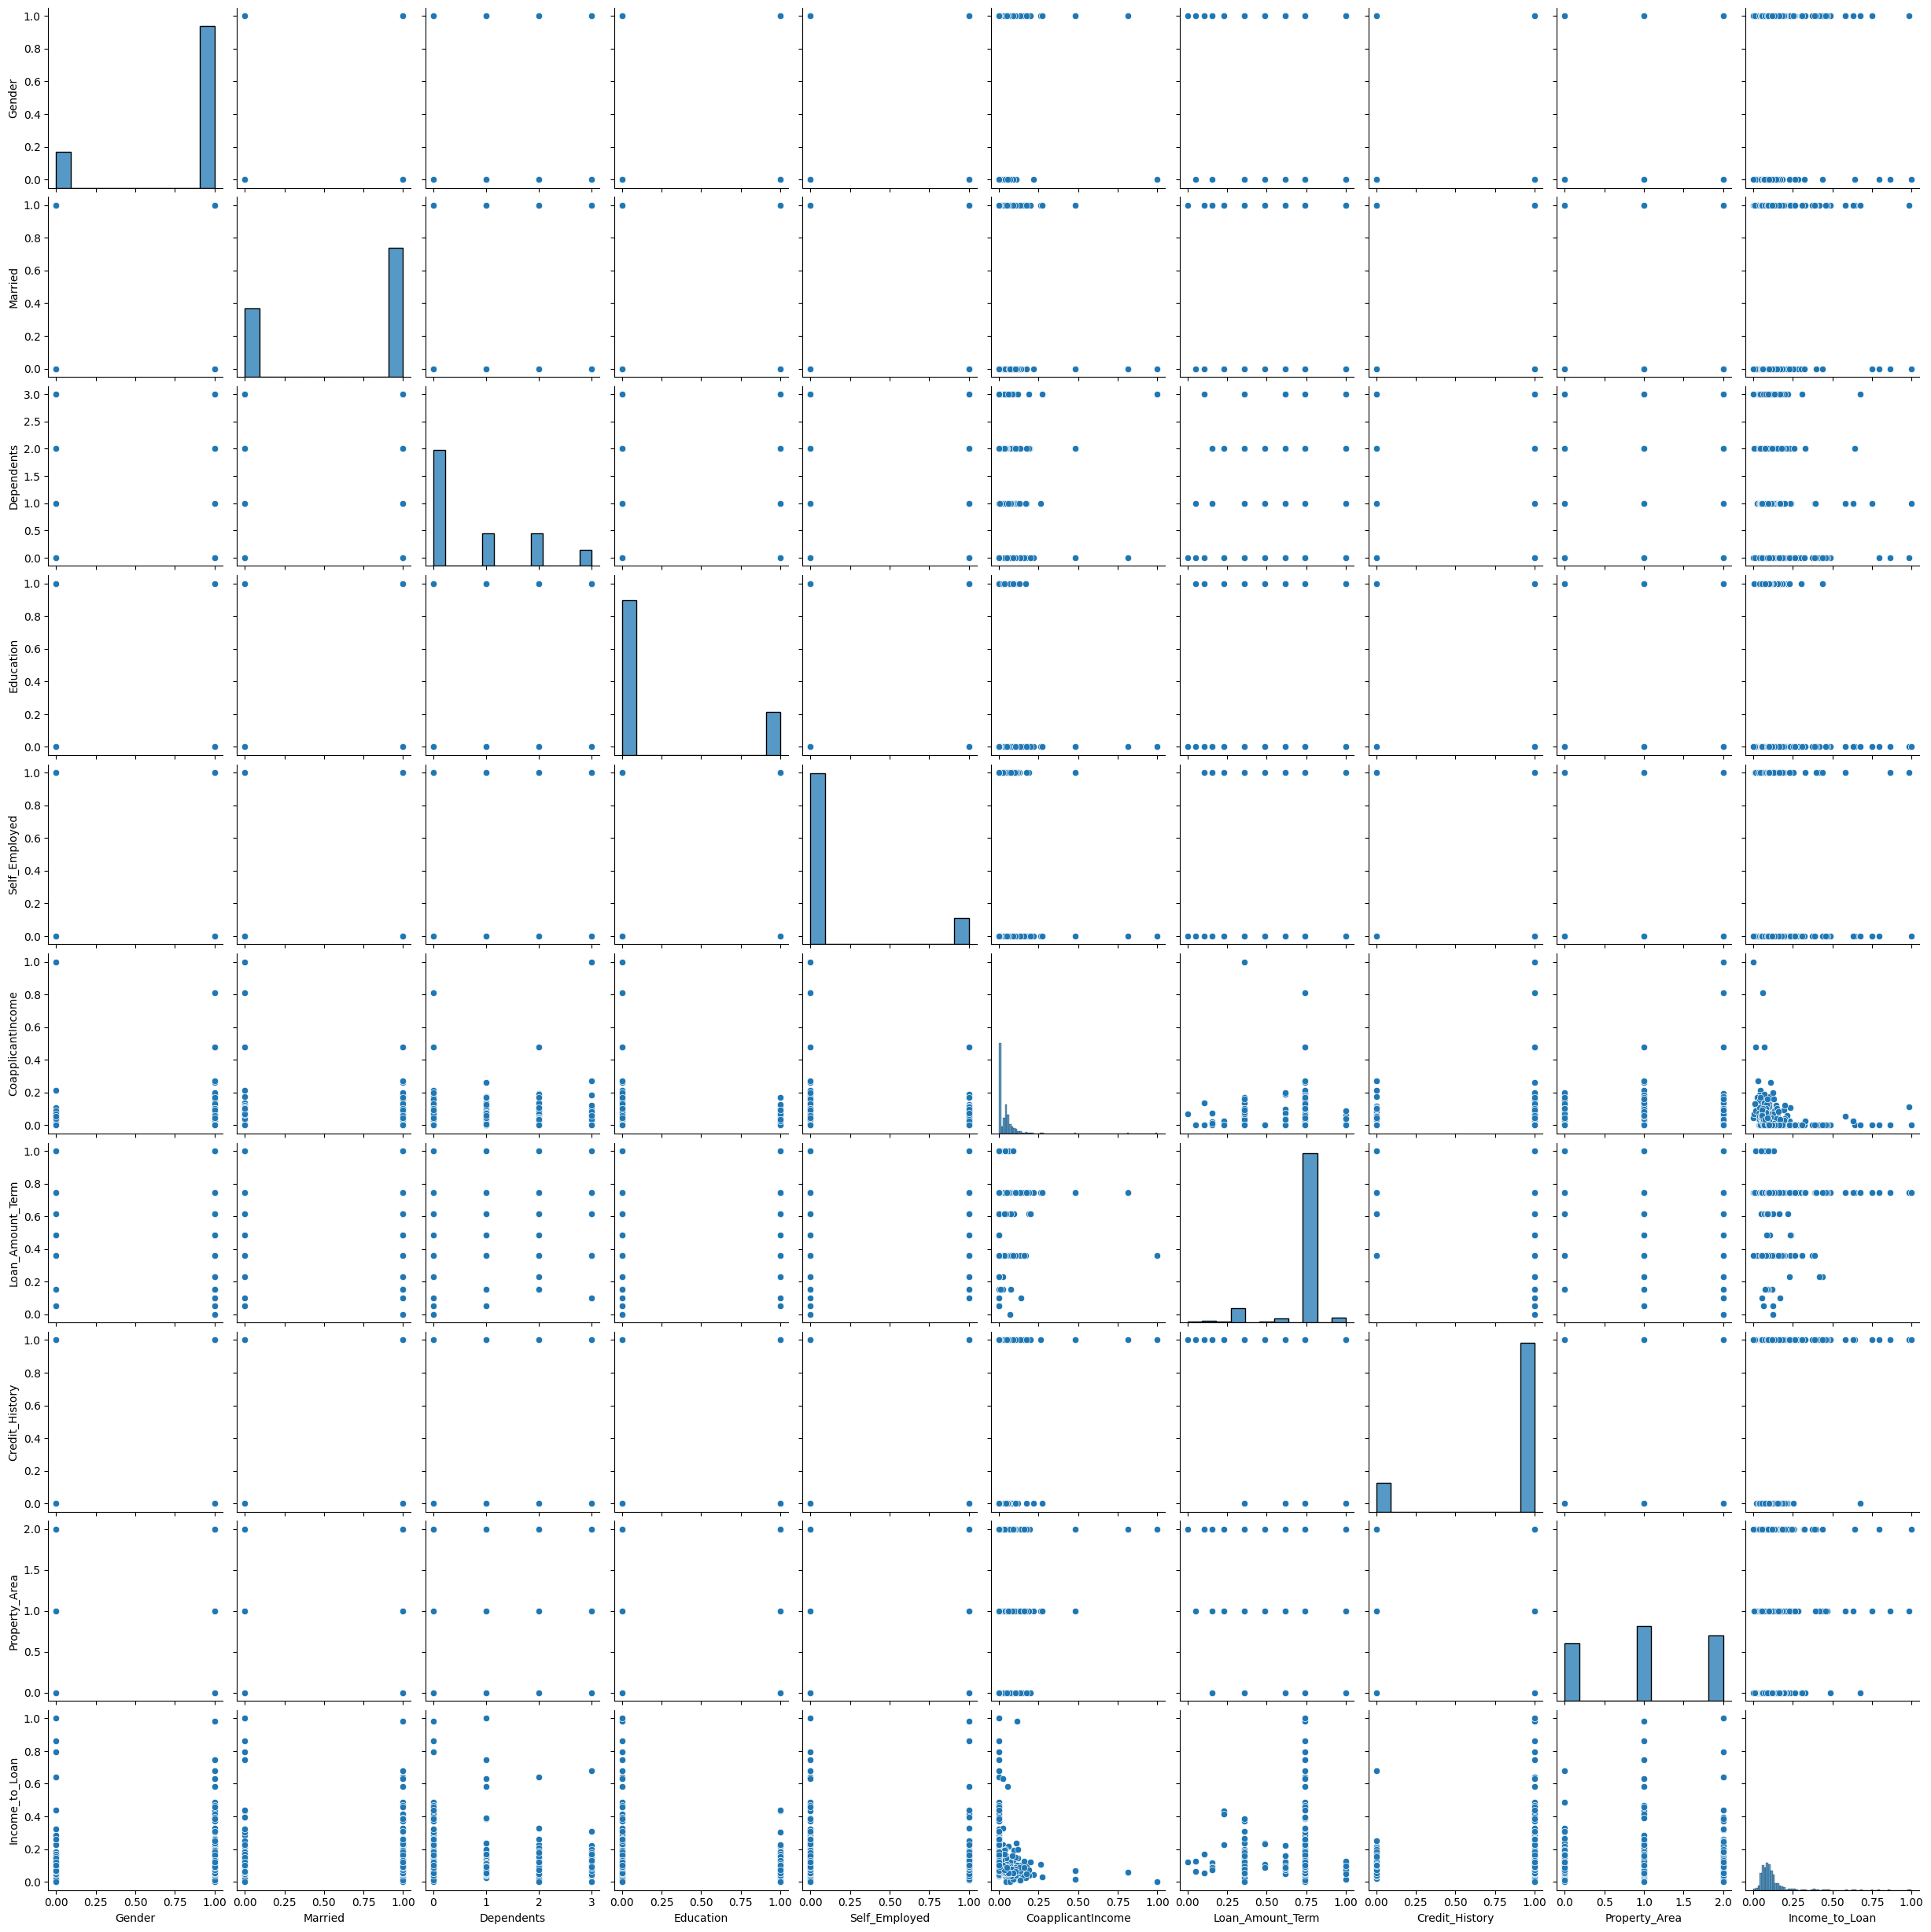

In [ ]:
sns.pairplot(df_train)

# Handling Outliers

In [ ]:
for col in df_train.columns:
    if pd.api.types.is_numeric_dtype(df_train[col]):

        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_train[col] = np.where(df_train[col] < lower_bound, lower_bound, df_train[col])
        df_train[col] = np.where(df_train[col] > upper_bound, upper_bound, df_train[col])


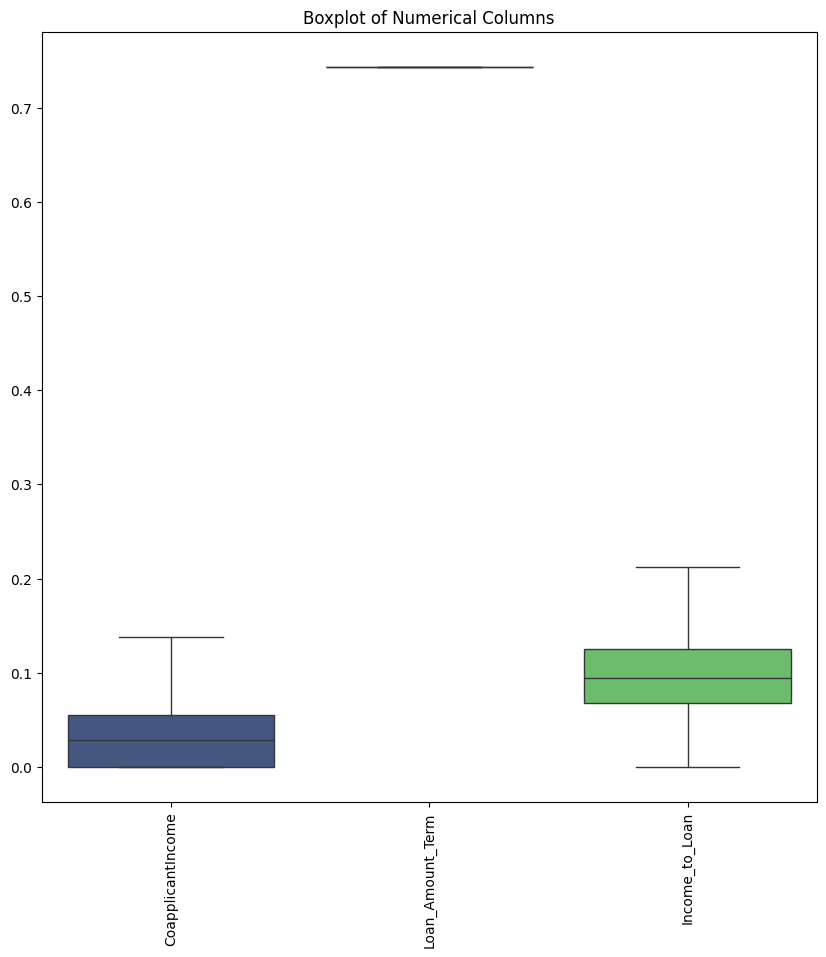

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_train[numerical_columns],palette='viridis')
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [ ]:
for col in df_test.columns:
    if pd.api.types.is_numeric_dtype(df_test[col]):

        Q1 = df_test[col].quantile(0.25)
        Q3 = df_test[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_test[col] = np.where(df_test[col] < lower_bound, lower_bound, df_test[col])
        df_test[col] = np.where(df_test[col] > upper_bound, upper_bound, df_test[col])


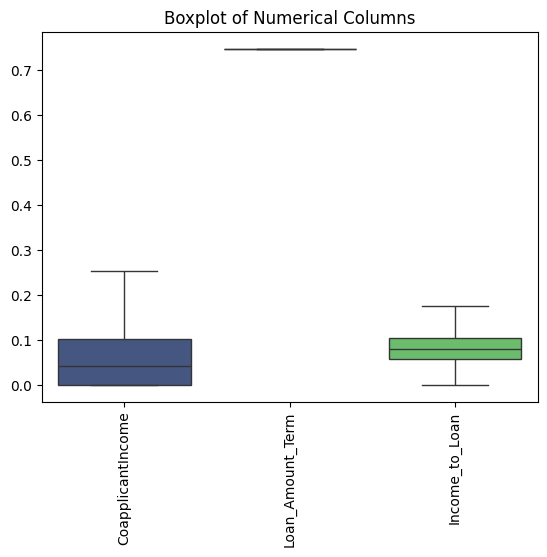

In [ ]:
plt.figure()
sns.boxplot(data=df_test[numerical_columns],palette='viridis')
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=90)
plt.show()


# Prediction Model

# SVM Model


In [ ]:
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4]
}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

best_svm = grid_search.best_estimator_
best_svm.fit(X_train_val, y_train_val)

y_val_pred = best_svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")


y_test_pred = best_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


print("\nTest Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# 1. Initialize and train SVM with probability=True
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# 2. Predict probabilities
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# 3. Compute AUC Score
auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f"SVM AUC Score: {auc_svm:.2f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Validation Accuracy: 0.7967
Test Accuracy: 0.8537

Test Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.55      0.70        38
           Y       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


Test Confusion Matrix:
[[21 17]
 [ 1 84]]
SVM AUC Score: 0.80


# **Random Forest**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# 1. Features and Target
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy' ,random_state=42)
rf_model.fit(X_train, y_train)

# 4. Predict and Evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Print Results
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC SCORE : ",{roc_auc_rf} )

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# 5. Optionally, perform cross-validation for better validation accuracy
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Validation Accuracy (CV): {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")


Random Forest Model Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           N       0.80      0.47      0.59        43
           Y       0.77      0.94      0.84        80

    accuracy                           0.77       123
   macro avg       0.78      0.70      0.72       123
weighted avg       0.78      0.77      0.75       123

ROC AUC SCORE :  {np.float64(0.7813953488372093)}
Confusion Matrix:
[[20 23]
 [ 5 75]]
Validation Accuracy (CV): 0.76 (+/- 0.08)


# **AdaBoost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score # Import roc_auc_score from sklearn.metrics instead of sklearn.model_selection


# 1. Features and Target
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada_model.fit(X_train, y_train)

# 4. Predict and Evaluate
y_pred_ada = ada_model.predict(X_test)
y_prob_ada = ada_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate ROC AUC score
roc_auc_ada = roc_auc_score(y_test, y_prob_ada)

# Print Results
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Print Results
print(f"AdaBoost Model Accuracy: {accuracy_ada:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))
print("ROC AUC SCORE : ",{roc_auc_ada} )

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

# 5. Optionally, perform cross-validation for better validation accuracy
cv_scores = cross_val_score(ada_model, X_train, y_train, cv=5)
print(f"Validation Accuracy (CV): {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

AdaBoost Model Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

ROC AUC SCORE :  {np.float64(0.7334302325581395)}
Confusion Matrix:
[[18 25]
 [ 1 79]]
Validation Accuracy (CV): 0.82 (+/- 0.06)


# **Naives Bayes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)

# 1. Define Features and Target
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

# Encode Target if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # e.g., Y -> 1, N -> 0

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# 3. Train Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 4. Predictions
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# 5. Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Naive Bayes Model Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 6. Cross-Validation
cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5)
print(f"\nValidation Accuracy (CV): {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")



Naive Bayes Model Accuracy: 0.79
ROC-AUC Score: 0.71

Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]

Validation Accuracy (CV): 0.81 (+/- 0.04)


# **Decision Tree**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Features and Target
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 4. Predict and Evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print Results
print(f"Decision Tree Model Accuracy: {accuracy_dt:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# 5. Optionally, perform cross-validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print(f"Validation Accuracy (CV): {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# 1. Train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Predict probabilities
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# 3. Compute AUC Score
auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"Decision Tree AUC Score: {auc_dt:.2f}")


Decision Tree Model Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           N       0.66      0.49      0.56        43
           Y       0.76      0.86      0.81        80

    accuracy                           0.73       123
   macro avg       0.71      0.68      0.68       123
weighted avg       0.72      0.73      0.72       123

Confusion Matrix:
[[21 22]
 [11 69]]
Validation Accuracy (CV): 0.71 (+/- 0.17)
Decision Tree AUC Score: 0.69


# **KNN**

In [7]:
# Example: Encoding categorical columns
df = df_train.copy();

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Split the dataset into features and target
X = df.drop('Loan_Status', axis=1)  # 'Loan_Status' is the target (change if your target column name is different)
y = df['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # or 'mean', 'median' depending on your data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [8]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict using KNN
knn_predictions = knn.predict(X_test)

# Evaluate KNN
print("KNN Classifier Results:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

KNN Classifier Results:
Accuracy: 0.5772357723577236
[[ 4 39]
 [13 67]]
              precision    recall  f1-score   support

           0       0.24      0.09      0.13        43
           1       0.63      0.84      0.72        80

    accuracy                           0.58       123
   macro avg       0.43      0.47      0.43       123
weighted avg       0.49      0.58      0.52       123

